In [2]:
#Import libraries
import panda as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix



ModuleNotFoundError: No module named 'panda'

In [ ]:
#Import Code
heart_data = pd.read_csv("./heart.csv", sep=',')
heart_data.head()
heart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
heart_data=heart_data.drop_duplicates(
)
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [42]:
heart_data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [4]:
#Data Cleaning
heart=heart_data.copy()
cat_cols=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
label_encoder=LabelEncoder()
for col in cat_cols:
   heart[col]=label_encoder.fit_transform(heart[col])
heart.describe()
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.2+ KB


In [5]:
#create features
X=heart.drop(['HeartDisease'], axis=1)

#create label
y=heart["HeartDisease"]




In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)


In [7]:
#Normalize 
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.fit_transform(X_test)


Picking the Model

In [8]:
#Perfect Predictons
y_train_perfect=y_train
perf_matrix=confusion_matrix(y_train,y_train_perfect)

In [54]:
#SGD
from sklearn.linear_model import SGDClassifier

SGD=SGDClassifier(random_state=42)
SGD.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
cross_val_SGD=cross_val_score(SGD, X_train, y_train, cv=3, scoring="accuracy")
print(cross_val_SGD)
y_train_pred_SGD=cross_val_predict(SGD, X_train, y_train, cv=3)

matrix_SGD=confusion_matrix(y_train, y_train_pred_SGD)
print(matrix_SGD)

SGD_diff=perf_matrix-matrix_SGD
print(SGD_diff)

#Precision
from sklearn.metrics import precision_score, recall_score, accuracy_score
SGD_prec=precision_score(y_train, y_train_pred_SGD)
print(SGD_prec)
#Recall
SGD_recall=recall_score(y_train, y_train_pred_SGD)
print(SGD_recall)
#f1
from sklearn.metrics import f1_score
f1_SGD=f1_score(y_train, y_train_pred_SGD)
print(f1_SGD)
#accuracy
accuracy_SGD=accuracy_score(y_train,y_train_pred_SGD)
print(accuracy_SGD)

[0.82040816 0.81632653 0.80327869]
[[270  63]
 [ 74 327]]
[[ 63 -63]
 [-74  74]]
0.8384615384615385
0.8154613466334164
0.8268015170670038
0.8133514986376021


In [56]:
#LOG
from sklearn.linear_model import LogisticRegression

LOG=LogisticRegression(random_state=42)
LOG.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score

cross_val_LOG=cross_val_score(LOG, X_train, y_train, cv=3, scoring="accuracy")
print(cross_val_LOG)
y_train_pred_LOG=cross_val_predict(LOG, X_train, y_train, cv=3)

matrix_LOG=confusion_matrix(y_train, y_train_pred_LOG)
print(matrix_LOG)

#difference between perfect model
LOG_diff=perf_matrix-matrix_LOG
print(LOG_diff)

LOG_prec=precision_score(y_train, y_train_pred_LOG)
print(LOG_prec)
#Recall
LOG_recall=recall_score(y_train, y_train_pred_LOG)
print(LOG_recall)
#f1
from sklearn.metrics import f1_score
f1_LOG=f1_score(y_train, y_train_pred_LOG)
print(f1_LOG)
#accuracy
accuracy_LOG=accuracy_score(y_train,y_train_pred_LOG)
print(accuracy_LOG)

[0.87346939 0.82857143 0.85245902]
[[273  60]
 [ 49 352]]
[[ 60 -60]
 [-49  49]]
0.8543689320388349
0.8778054862842892
0.8659286592865927
0.8514986376021798


In [59]:
#K-Nearest
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
cross_val_knn=cross_val_score(knn, X_train, y_train, cv=3, scoring="accuracy")

print(cross_val_knn)
y_train_pred_knn=cross_val_predict(knn, X_train, y_train, cv=3)

matrix_knn=confusion_matrix(y_train, y_train_pred_knn)
print(matrix_LOG)

#difference between perfect model
knn_diff=perf_matrix-matrix_knn
print(knn_diff)

knn_prec=precision_score(y_train, y_train_pred_knn)
print(knn_prec)
#Recall
knn_recall=recall_score(y_train, y_train_pred_knn)
print(knn_recall)
#f1
from sklearn.metrics import f1_score
f1_knn=f1_score(y_train, y_train_pred_knn)
print(f1_knn)
#accuracy
accuracy_knn=accuracy_score(y_train,y_train_pred_knn)
print(accuracy_knn)



[0.88163265 0.84081633 0.8442623 ]
[[273  60]
 [ 49 352]]
[[ 58 -58]
 [-48  48]]
0.8588807785888077
0.8802992518703242
0.8694581280788177
0.8555858310626703


In [60]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DTC=cross_val_score(dtc, X_train, y_train, cv=3, scoring="accuracy")

print(DTC)
y_train_pred_dtc=cross_val_predict(dtc, X_train, y_train, cv=3)

matrix_dtc=confusion_matrix(y_train, y_train_pred_dtc)
print(matrix_dtc)

#difference between perfect model
dtc_diff=perf_matrix-matrix_dtc
print(dtc_diff)

dtc_prec=precision_score(y_train, y_train_pred_dtc)
print(dtc_prec)
#Recall
dtc_recall=recall_score(y_train, y_train_pred_dtc)
print(dtc_recall)
#f1
from sklearn.metrics import f1_score
f1_dtc=f1_score(y_train, y_train_pred_dtc)
print(f1_dtc)
#accuracy
accuracy_dtc=accuracy_score(y_train,y_train_pred_dtc)
print(accuracy_dtc)



[0.8        0.80408163 0.77459016]
[[253  80]
 [ 75 326]]
[[ 80 -80]
 [-75  75]]
0.8029556650246306
0.8129675810473815
0.8079306071871127
0.7888283378746594


In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)



rf_score=cross_val_score(rf, X_train, y_train, cv=3, scoring="accuracy")

print(rf_score)
y_train_pred_rf=cross_val_predict(rf, X_train, y_train, cv=3)

matrix_rf=confusion_matrix(y_train, y_train_pred_rf)
print(matrix_rf)

#difference between perfect model
rf_diff=perf_matrix-matrix_rf
print(rf_diff)



rf_prec=precision_score(y_train, y_train_pred_rf)
print(rf_prec)
#Recall
rf_recall=recall_score(y_train, y_train_pred_rf)
print(rf_recall)
#f1
from sklearn.metrics import f1_score
f1_rf=f1_score(y_train, y_train_pred_rf)
print(f1_dtc)
#accuracy
accuracy_rf=accuracy_score(y_train,y_train_pred_rf)
print(accuracy_rf)



[0.87755102 0.85714286 0.85245902]
[[274  59]
 [ 42 359]]
[[ 59 -59]
 [-42  42]]
0.8588516746411483
0.8952618453865336
0.8079306071871127
0.8623978201634878


In [95]:
#Dummy
from sklearn.dummy import DummyClassifier
dummy=DummyClassifier()
dummy.fit(X_train, y_train)

cross_val_score(dummy, X_train, y_train, cv=3, scoring="accuracy")

y_train_pred_dum=cross_val_predict(dummy, X_train, y_train, cv=3)

dum_prec=precision_score(y_train, y_train_pred_dum)
print(dum_prec)
#Recall
dum_recall=recall_score(y_train, y_train_pred_dum)
print(dum_recall)
#f1
from sklearn.metrics import f1_score
f1_dum=f1_score(y_train, y_train_pred_dum)
print(f1_dum)
#accuracy
accuracy_dum=accuracy_score(y_train,y_train_pred_dum)
print(accuracy_dum)

0.5463215258855586
1.0
0.7066079295154186
0.5463215258855586


In [104]:
table=[[SGD, round(SGD_prec*100,2), round(SGD_recall*100,2), round(f1_SGD*100,2), round(accuracy_SGD*100,2) ],
       [LOG, round(LOG_prec*100,2), round(LOG_recall*100,2), round(f1_LOG*100,2), round(accuracy_LOG*100,2) ],
       [knn, round(knn_prec*100,2), round(knn_recall*100,2), round(f1_knn*100,2), round(accuracy_knn*100,2) ],
       [dtc, round(dtc_prec*100,2), round(dtc_recall*100,2), round(f1_dtc*100,2), round(accuracy_dtc*100,2) ],
       ['RandomForestClassifier()', round(rf_prec*100,2), round(rf_recall*100,2), round(f1_rf*100,2), round(accuracy_rf*100,2) ],
       [dummy, round(dum_prec*100,2), round(dum_recall*100,2), round(f1_dum*100,2), round(accuracy_dum*100,2)
       ]]

df=pd.DataFrame(table, columns=['Model','Precision','Recall','F1','Accuracy'])
display(df)

,Model,Precision,Recall,F1,Accuracy
0,SGDClassifier(random_state=42),83.85,81.55,86.59,81.34
1,LogisticRegression(random_state=42),85.44,87.78,86.95,85.56
2,KNeighborsClassifier(),85.89,88.03,86.95,85.56
3,DecisionTreeClassifier(),80.30,81.30,80.79,78.88
4,RandomForestClassifier(),85.89,89.53,88.08,86.24
5,DummyClassifier(),54.63,100.00,70.66,54.63


In [64]:
#get predicted probabilities
y_pred_proba = rf.predict_proba(X_test)[:,1]

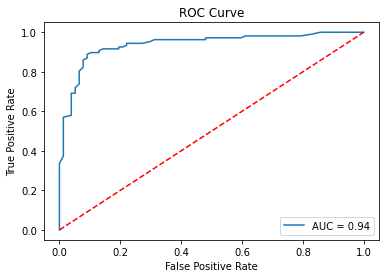

In [98]:
fpr, tpr, threshold=metrics.roc_curve(y_test, y_pred_proba)
roc_auc=metrics.auc(fpr,tpr)

#plot ROC curve
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [66]:
feature_importance=rf.feature_importances_
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
std=np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)

<AxesSubplot:>

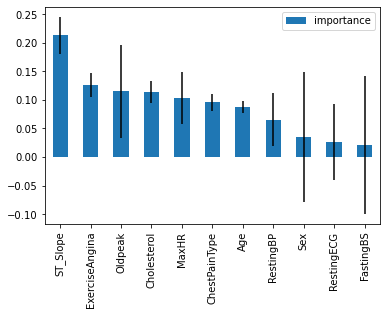

In [67]:
columns_=heart_data.iloc[:,:-1].columns


forest_importances=pd.DataFrame(feature_importance, index=columns_, columns=['importance']).sort_values('importance', ascending=False)

fig, ax=plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)

